# CUSTOMER SEGMENTATION USING k-Means

# # Importing Necessary Packages

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline 

# # Reading the Dataset into the project

In [68]:
df = pd.read_csv('mallcustomers.csv')
print ("Shape of dataset: ", df.shape)
df.head(25)

Shape of dataset:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# # Data Preprocessing

In [69]:
#convert male to 0 and female to 1
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
df.head() 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [70]:
#Normalizing the data
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
print(Clus_dataSet)

[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [ 0.88640526 -1.20926872 -1.66266033  1.00159627]
 [ 0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [ 0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.12815215  1.80493225 -1.58632148 -1.83237767]
 [ 0.88640526 -0.6351352  -1.58632148  0.84631002]
 [-1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [ 0.88640526 -0.27630176 -1.58632148  1.89449216]
 [ 0.88640526  1.37433211 -1.54815205 -1.36651894]
 [ 0.88640526 -1.06573534 -1.54815205  1.04041783]
 [-1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [-1.12815215 -1.20926872 -1.54815205  1.11806095]
 [ 0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [-1.12815215 -1.3528021  -1.50998262  0.61338066]
 [-1.12815215  0.94373197 -1.43364376 -0.82301709]
 [ 0.88640526 -0.27630176 -1.43

# # Modelling

In [99]:
#using k-means to model the dataframe with 3 clusters
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [100]:
#assign labels to each row in the dataframe
df["Clus_km"] = labels
label_view = df.head(5)
print(label_view)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Clus_km  
0        3  
1        0  
2        3  
3        0  
4        3  


In [101]:
#checking for the centroid values by average
centroid = df.groupby('Clus_km').mean()
print(centroid)

         CustomerID    Gender        Age  Annual Income (k$)  \
Clus_km                                                        
0         24.000000  0.608696  25.521739           26.304348   
1         86.265823  0.582278  43.088608           55.291139   
2        162.000000  0.538462  32.692308           86.538462   
3         23.000000  0.608696  45.217391           26.304348   
4        163.500000  0.472222  40.666667           87.750000   

         Spending Score (1-100)  
Clus_km                          
0                     78.565217  
1                     49.569620  
2                     82.128205  
3                     20.913043  
4                     17.583333  


# # Data Visualization

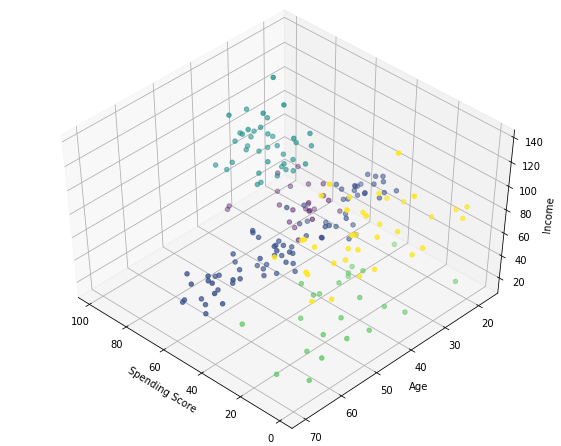

In [102]:
#plotting the image of the scatter plot 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Gender', fontsize=16)
# plt.zlabel('Income', fontsize=16)
ax.set_xlabel('Spending Score')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float))
plt.show()



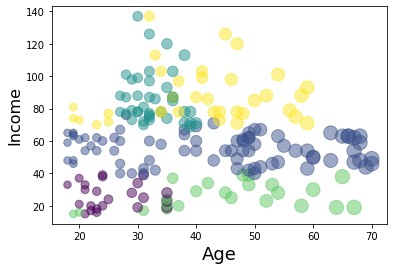

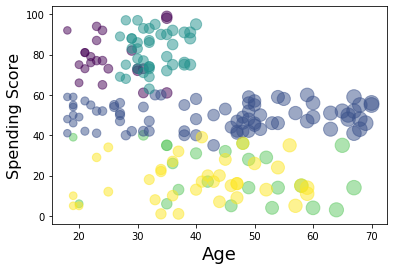

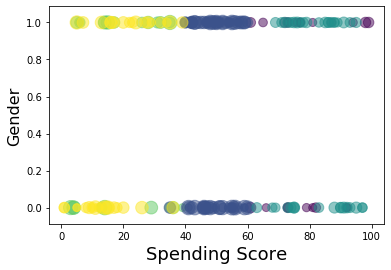

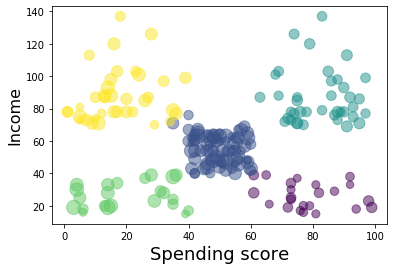

In [104]:
#Plotting Age and Income
area = np.pi * ( X[:, 1])**1
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

#Plotting spending score and age
area = np.pi * ( X[:, 1])**1
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.show()

#plotting spending score to gender
area = np.pi * ( X[:, 1])**1
plt.scatter(X[:, 3], X[:, 0], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Spending Score', fontsize=18)
plt.ylabel('Gender', fontsize=16)
plt.show()

#plotting spending score to income
area = np.pi * ( X[:, 1])**1
plt.scatter(X[:, 3], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Spending score', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()


# Final Analysis
### 1.  Age not Gender is the major determinant in the Spending Score
### 2.  Individuals in their Mid twenties till late 40's have the highest spending score because they have the highest income
### 3.  There are 3 High Priority group and 2 Low Priority group to hit 60% conversion.
        1. HIGH PRIORITY GROUPS
             A. Indiviuals with age range 25 - 40
             B. Kids,Teens and Young Adults (ages 15 - 35)(I think the reason is because Individuals between age 25 - 40 are raising the Teens and they have the income)
        2. MID PRIORITY GROUP
             Individuals between age 35 - 70 majorly, they are mid income earners and probably buy for validation
        
Orange color are high income earners but do not buy, the green color are low income earners and do not buy either and they span all ages from 17 - 70.
        